<a href="https://colab.research.google.com/github/odeyale2016/-_-1/blob/main/Water_Quality_Monitoring_with_RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Topic: Water Quality Monitoring System using Recurrent Neural Network (RNNs) and Internet of Things (IoT)


## Author:



## Step 1: Import necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Metrics Libraries
from sklearn.metrics import mean_squared_error,r2_score
# Disable all warnings
import os
import warnings
warnings.filterwarnings("ignore")
print("All Libraries imported successfully")

All Libraries imported successfully


## Step 2: Load the Water monitoring  Dataset

In [ ]:
# Load data
data = pd.read_csv('water_quality.csv')
data

,Timestamp,Record number,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
0,8/4/2023 23:00,1468,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
1,8/4/2023 23:30,1469,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2,8/4/2023 23:00,1470,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
3,8/4/2023 23:30,1471,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
4,8/4/2023 23:00,1472,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944
...,...,...,...,...,...,...,...,...,...,...,...
30889,6/27/2024 8:20,32357,82.720,0.944,18.607,6.876,87.556,8.151,29.268,45.134,3.963
30890,6/27/2024 8:30,32358,18.081,1.161,18.551,6.918,87.987,8.163,29.254,45.115,3.928
30891,6/27/2024 8:40,32359,306.184,1.192,18.558,6.651,84.606,8.145,29.250,45.110,4.097
30892,6/27/2024 8:50,32360,24.711,1.031,18.547,6.740,85.713,8.154,29.247,45.105,4.962


In [ ]:
data.info() # checking the general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30894 entries, 0 to 30893
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       30894 non-null  object 
 1   Record number                   30894 non-null  int64  
 2   Average Water Direction         30893 non-null  float64
 3   Chlorophyll                     30309 non-null  float64
 4   Temperature                     25730 non-null  float64
 5   Dissolved Oxygen                26594 non-null  float64
 6   Dissolved Oxygen (%Saturation)  25145 non-null  float64
 7   pH                              29810 non-null  float64
 8   Salinity                        26936 non-null  float64
 9   Specific Conductance            29527 non-null  float64
 10  Turbidity                       28894 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


##  Step 3: Exploratory Data Analysis (EDA)

In [ ]:
data.isnull().sum() # checking for the missing values in the dataset

Timestamp                            0
Record number                        0
Average Water Direction              1
Chlorophyll                        585
Temperature                       5164
Dissolved Oxygen                  4300
Dissolved Oxygen (%Saturation)    5749
pH                                1084
Salinity                          3958
Specific Conductance              1367
Turbidity                         2000
dtype: int64

In [ ]:
# Fill all the missing values with zero value
data.fillna((0), inplace=True)

In [ ]:
data.isnull().sum() # checking for the missing values in the dataset

Timestamp                         0
Record number                     0
Average Water Direction           0
Chlorophyll                       0
Temperature                       0
Dissolved Oxygen                  0
Dissolved Oxygen (%Saturation)    0
pH                                0
Salinity                          0
Specific Conductance              0
Turbidity                         0
dtype: int64

In [ ]:
data.describe() # Descriptive Statistics of the dataset

,Record number,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
count,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000,30894.000000
mean,16914.500000,177.538965,2.729567,20.334307,5.866586,78.657446,7.780339,27.031266,45.806788,3.686513
std,8918.473945,103.625032,1.880352,9.651962,2.428348,38.315961,1.486409,10.856538,11.070081,4.056342
min,1468.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9191.250000,86.292250,1.401000,19.279250,6.144250,85.695000,7.973000,28.540000,44.773000,2.083000
50%,16914.500000,176.324500,2.329000,24.034000,6.675000,94.516500,8.067000,29.981500,47.187000,2.994000
75%,24637.750000,267.868500,3.618000,26.905750,7.177000,100.229750,8.138000,32.830750,53.219000,3.902750
max,32361.000000,359.994000,43.301000,32.063000,9.260000,134.082000,8.255000,36.000000,54.996000,49.869000


In [ ]:
data.head()

,Timestamp,Record number,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
0,8/4/2023 23:00,1468,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
1,8/4/2023 23:30,1469,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2,8/4/2023 23:00,1470,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
3,8/4/2023 23:30,1471,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
4,8/4/2023 23:00,1472,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944


In [ ]:
#  Convert 'Date' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [ ]:
data.head()

,Timestamp,Record number,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
0,2023-08-04 23:00:00,1468,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
1,2023-08-04 23:30:00,1469,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2,2023-08-04 23:00:00,1470,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
3,2023-08-04 23:30:00,1471,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
4,2023-08-04 23:00:00,1472,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944


In [ ]:
# Set 'Timestamp' column as index
data.set_index('Timestamp', inplace=True)

In [ ]:
data.head()

,Record number,Average Water Direction,Chlorophyll,Temperature,Dissolved Oxygen,Dissolved Oxygen (%Saturation),pH,Salinity,Specific Conductance,Turbidity
Timestamp,,,,,,,,,,
2023-08-04 23:00:00,1468,73.484,1.621,20.018,7.472,101.175,8.176,35.215,53.262,2.068
2023-08-04 23:30:00,1469,106.424,1.959,19.986,7.455,100.884,8.175,35.209,53.254,1.994
2023-08-04 23:00:00,1470,156.755,1.620,20.001,7.430,100.571,8.171,35.207,53.252,2.030
2023-08-04 23:30:00,1471,281.754,1.761,19.983,7.419,100.398,8.171,35.211,53.257,1.973
2023-08-04 23:00:00,1472,244.637,1.635,19.986,7.429,100.538,8.171,35.208,53.253,1.944


## Checking and Dealing with Outliers

========================Before the removal of outliers===================================================


Text(0.5, 1.0, "['Turbidity']")

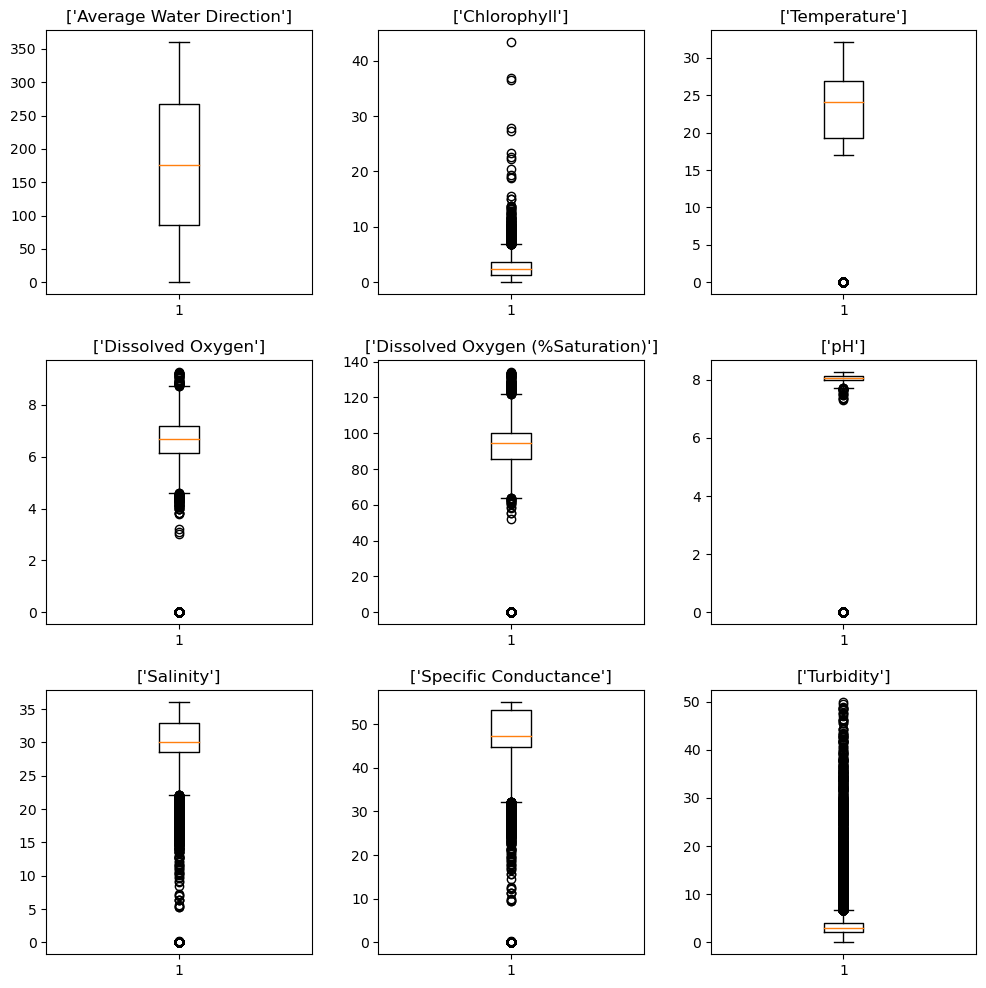

In [ ]:
print("========================Before the removal of outliers===================================================")
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(data['Average Water Direction'])
ax[0][0].set_title(['Average Water Direction'])

ax[0][1].boxplot(data['Chlorophyll'])
ax[0][1].set_title(['Chlorophyll'])

ax[0][2].boxplot(data['Temperature'])
ax[0][2].set_title(['Temperature'])

ax[1][0].boxplot(data['Dissolved Oxygen'])
ax[1][0].set_title(['Dissolved Oxygen'])

ax[1][1].boxplot(data['Dissolved Oxygen (%Saturation)'])
ax[1][1].set_title(['Dissolved Oxygen (%Saturation)'])

ax[1][2].boxplot(data['pH'])
ax[1][2].set_title(['pH'])

ax[2][0].boxplot(data['Salinity'])
ax[2][0].set_title(['Salinity'])

ax[2][1].boxplot(data['Specific Conductance'])
ax[2][1].set_title(['Specific Conductance'])

ax[2][2].boxplot(data['Turbidity'])
ax[2][2].set_title(['Turbidity'])

In [ ]:
# From the visualization above, only Average Water Direction and Temperature does not contain Outliers

In [ ]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data, 'Chlorophyll')
drop_outliers(data, 'Dissolved Oxygen')
drop_outliers(data, 'Dissolved Oxygen (%Saturation)')
drop_outliers(data, 'pH')
drop_outliers(data, 'Salinity')
drop_outliers(data, 'Specific Conductance')
drop_outliers(data, 'Turbidity')


========================After the removal of outliers===================================================


Text(0.5, 1.0, "['Turbidity']")

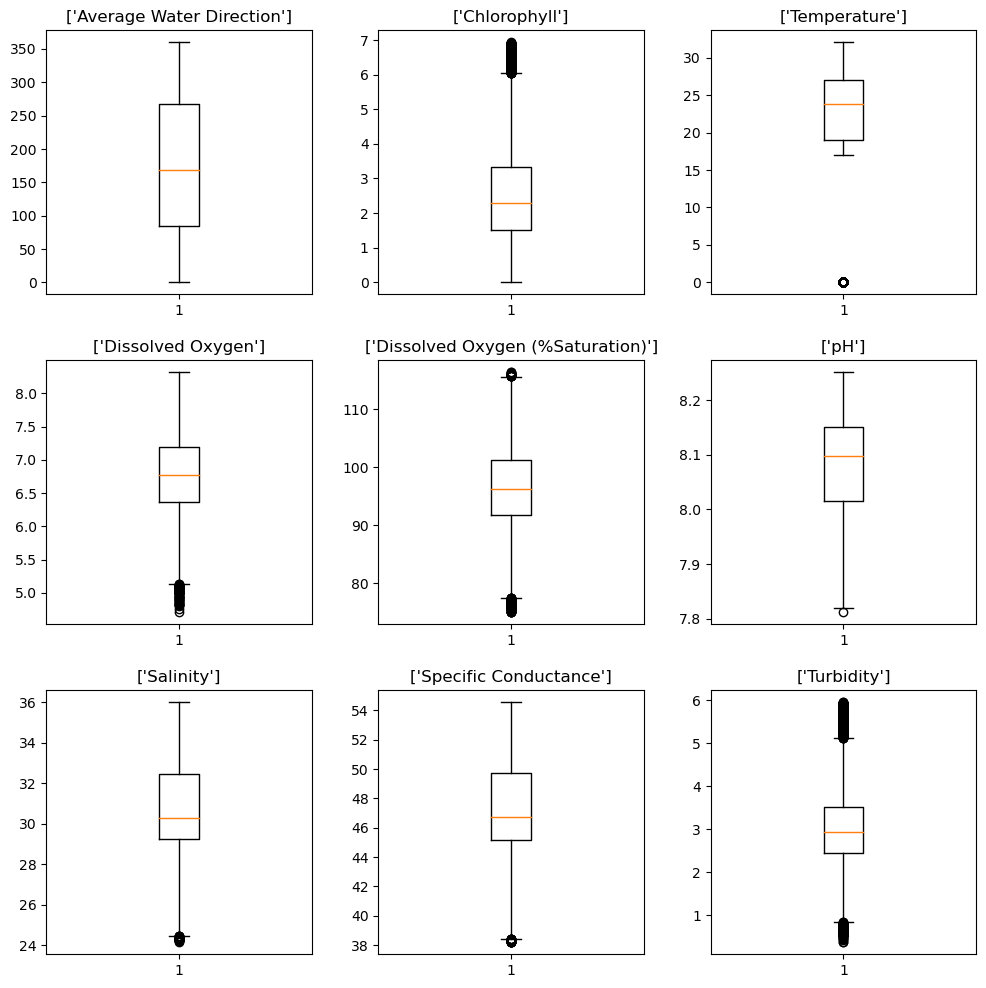

In [ ]:
print("========================After the removal of outliers===================================================")
fig, ax = plt.subplots(3,3, figsize=(12,12))
fig.subplots_adjust(wspace=0.25, hspace=0.25)

ax[0][0].boxplot(data['Average Water Direction'])
ax[0][0].set_title(['Average Water Direction'])

ax[0][1].boxplot(data['Chlorophyll'])
ax[0][1].set_title(['Chlorophyll'])

ax[0][2].boxplot(data['Temperature'])
ax[0][2].set_title(['Temperature'])

ax[1][0].boxplot(data['Dissolved Oxygen'])
ax[1][0].set_title(['Dissolved Oxygen'])

ax[1][1].boxplot(data['Dissolved Oxygen (%Saturation)'])
ax[1][1].set_title(['Dissolved Oxygen (%Saturation)'])

ax[1][2].boxplot(data['pH'])
ax[1][2].set_title(['pH'])

ax[2][0].boxplot(data['Salinity'])
ax[2][0].set_title(['Salinity'])

ax[2][1].boxplot(data['Specific Conductance'])
ax[2][1].set_title(['Specific Conductance'])

ax[2][2].boxplot(data['Turbidity'])
ax[2][2].set_title(['Turbidity'])

# Checking if Dimensionality Reduction is necessary

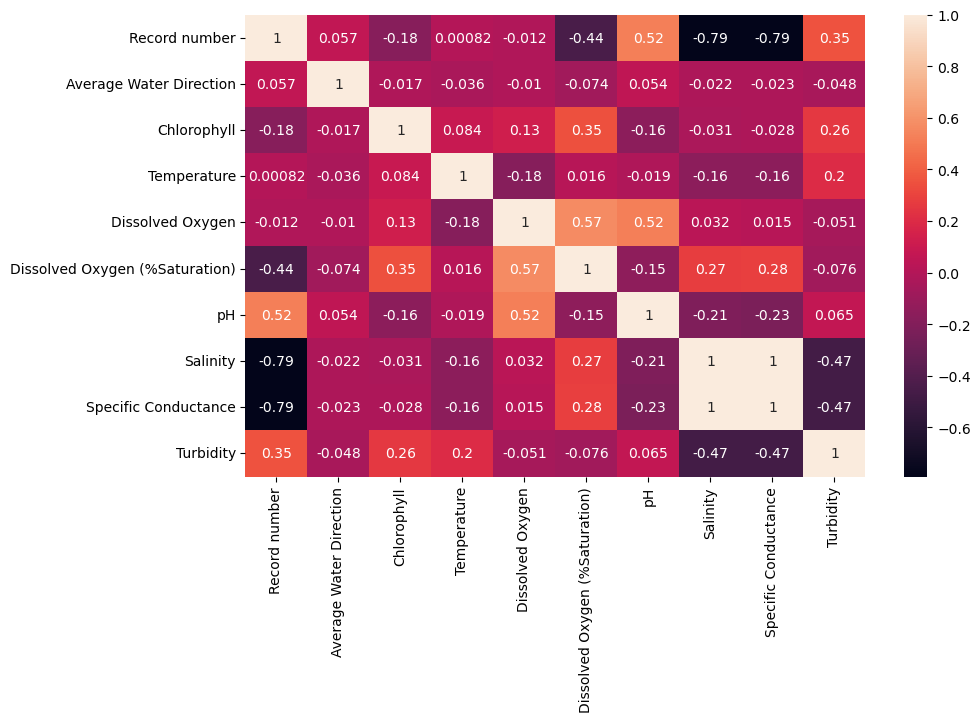

In [ ]:
sns.heatmap(data.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

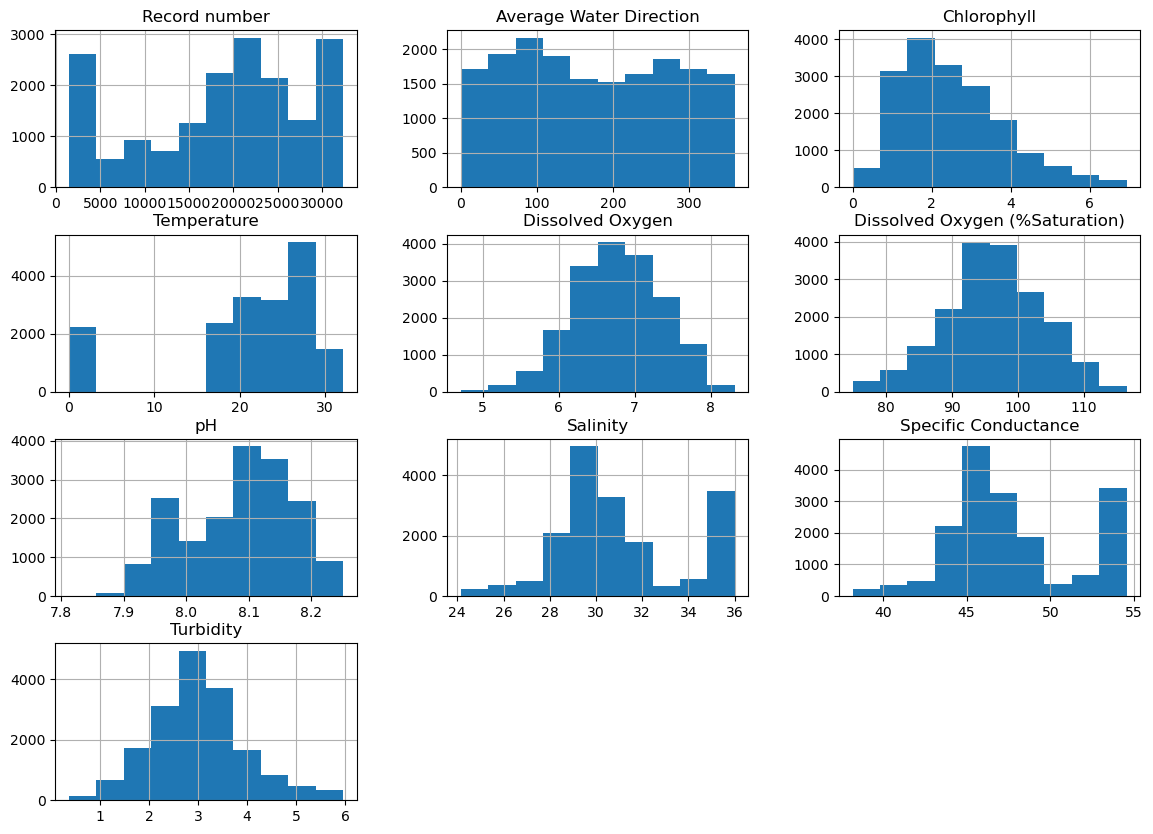

In [ ]:
data.hist(figsize=(14,10))
plt.show()

## Step 4: Split the dataset into train and test data

In [ ]:
# Normalize data
scaler = MinMaxScaler()
data_scaled= scaler.fit_transform(data)

In [ ]:
# Prepare time series data
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(data_scaled, time_steps)
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0729 - val_loss: 0.0171
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0205 - val_loss: 0.0172
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0180 - val_loss: 0.0158
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0165 - val_loss: 0.0145
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0148 - val_loss: 0.0142
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0132 - val_loss: 0.0130
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0127 - val_loss: 0.0134
Epoch 12/100
353/353 ━━━━━━━━

In [ ]:
# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129
Test Loss: 0.012153670191764832


In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
y_pred = model.predict(X_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
print(('R-Squared: ', r2_score(y_test,y_pred)))

('R-Squared: ', -6913.784310861765)


In [ ]:
print('Mean squared error', mean_squared_error(y_pred,y_test))

Mean squared error 8.872719429433302e+16


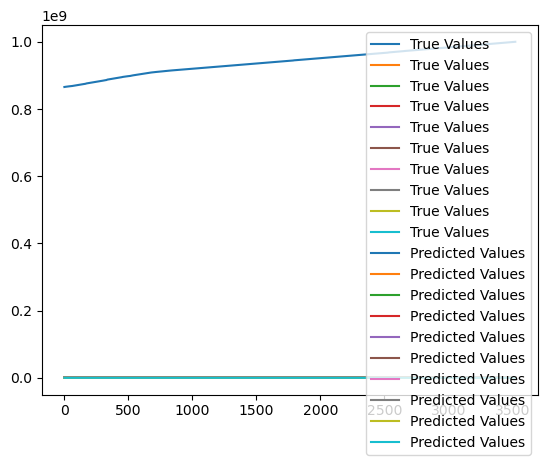

In [ ]:
# Plot resultsimport matplotlib.pyplot as plt

plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Prepare time series data
def create_dataset(data, time_window, label):
    X, y = [], []
    for i in range(len(data) - time_window-1):
        a=data[i:i + time_window,0:data.shape[1]]
        X.append(a)
        y.append(data[i + time_window,label])
    return (np.array(X), np.array(y))



In [ ]:
dt_arr = np.array(data)
dt_arr

array([[0.00000000e+00, 2.04081406e-01, 2.33674499e-01, ...,
        9.33755274e-01, 9.21525486e-01, 3.04487753e-01],
       [3.23708403e-05, 2.95588015e-01, 2.82398731e-01, ...,
        9.33248945e-01, 9.21036548e-01, 2.91256928e-01],
       [6.47416807e-05, 4.35406446e-01, 2.33530345e-01, ...,
        9.33080169e-01, 9.20914314e-01, 2.97693546e-01],
       ...,
       [9.99935258e-01, 5.01730681e-02, 1.67363414e-01, ...,
        4.30717300e-01, 4.23603471e-01, 6.37046308e-01],
       [9.99967629e-01, 8.50516982e-01, 1.71832204e-01, ...,
        4.30379747e-01, 4.23297885e-01, 6.67262650e-01],
       [1.00000000e+00, 6.85910649e-02, 1.48623324e-01, ...,
        4.30126582e-01, 4.22992299e-01, 8.21920257e-01]])

In [ ]:
# Splitting the data into train and test
dt_train, dt_test = dt_arr[0:round(0.75*len(dt_arr))], dt_arr[round(0.75*len(dt_arr)):]

In [ ]:
X_train,y_train=create_dataset(dt_train, 100, 1)
X_test, y_test=create_dataset(dt_test, 100, 1)

In [ ]:
X_train.shape, y_train.shape

((13125, 100, 10), (13125,))

# Defining the model

In [ ]:
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1, 'linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0938
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.0833
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0821
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0813
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.0832
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - loss: 0.0817
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0822
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0809
Epoch 9/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - loss: 0.0816
Epoch 10/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - loss: 0.0807


In [ ]:
y_pred = model.predict(X_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


In [ ]:
print(('R-Squared: ', r2_score(y_test,y_pred)))

('R-Squared: ', -0.024988497867024728)


In [ ]:
print('Mean squared error', mean_squared_error(y_pred,y_test))

Mean squared error 0.07921620166160226


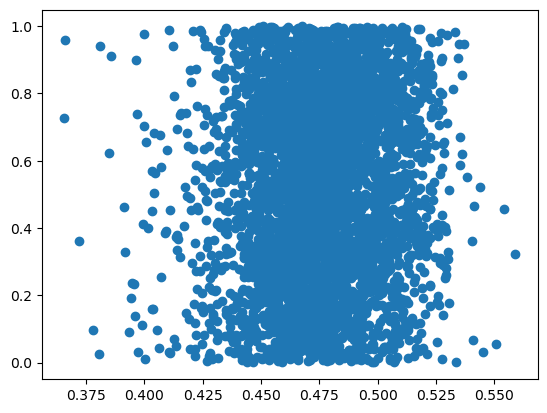

In [ ]:
plt.scatter(y_pred, y_test)

# Step 5: Building and Training of the RNN Model

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0648 - val_loss: 0.0171
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0203 - val_loss: 0.0157
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0175 - val_loss: 0.0161
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0143 - val_loss: 0.0145
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0139 - val_loss: 0.0134
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0134 - val_loss: 0.0135
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0130 - val_loss: 0.0134
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0130 - val_loss: 0.0128
Epoch 12/100
353/353 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Test Loss: 0.012386619113385677


In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


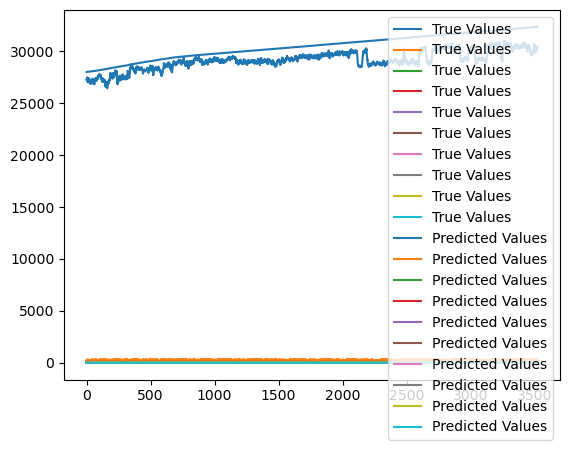

In [ ]:
# Plot results
import matplotlib.pyplot as plt

plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.show()